## Notes / ToDo
- Cut off the likelihood for high / problematic dedx values (only focus on values located in the region around the peak)
- Look into developing analytic likelihood based on the mpv fit. This would most likely have to take the pitch into account 
- See if single muon fit mpvs have any correlation with fit mpvs. Build likelihood from that alone.


- Langau pdf maximum deviates slightly from the mpv parameter used to generate it. This is clearly because of the Gaussian convolution, but I thought it was worth mentioning. Important to note that this deviation is in the wrong direction---the true maximum is slightly *greater* than the one measured, and so this correction does not solve the problem of the Langau mpvs being higher than expected.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import LogNorm
from util.cer_util import CER
import warnings
import pylandau
import datetime
warnings.filterwarnings('ignore')
plt.style.use('stylesheets/eloss.mplstyle')

In [42]:
like_data_loc = r'./data/stat_binned_cut_likelihood_reconstruction.csv'
# like_data_loc = r'./data/stat_binned_likelihood_data.csv'
likedf = pd.read_csv(like_data_loc)
display(likedf)
fit_data_loc = r'./data/stat_fit_data_full.csv'
fitdf = pd.read_csv(fit_data_loc)
display(fitdf)

,truth,reconstructed_min,reconstructed_max,L0,L1,L2,L3,L4,L5,L6,...,L10,L11,L12,L13,L14,L15,L16,L17,L18,L19
0,9.338426,30.691736,99.727712,-604.008981,-605.332468,-603.825488,-600.197358,-597.232647,-594.143118,-592.871535,...,-588.348777,-587.744521,-587.676573,-587.207719,-586.721673,-586.352854,-586.474350,-586.362608,-586.451563,-586.142984
1,1.164180,0.775131,1.051753,-458.536962,-457.665330,-457.785348,-458.845561,-460.024969,-462.321428,-463.259519,...,-470.525744,-472.160734,-472.716508,-474.480025,-477.613897,-478.514616,-480.294144,-482.219703,-482.548586,-484.020737
2,19.353519,6.341753,7.499147,-264.981558,-265.991413,-265.631996,-264.352969,-263.550458,-262.229144,-262.234500,...,-260.945930,-261.185608,-260.913784,-260.715914,-261.002267,-260.876169,-261.497219,-260.898439,-261.395487,-261.180422
3,6.567811,0.100015,0.775131,-1293.009707,-1296.589292,-1305.995610,-1325.825538,-1346.961389,-1359.886179,-1383.048954,...,-1441.217033,-1463.596848,-1460.172224,-1468.654760,-1498.432115,-1501.302837,-1528.062013,-1521.479278,-1536.563965,-1538.812821
4,4.045986,0.100015,0.775131,-717.357519,-717.623486,-719.709761,-723.857708,-729.213096,-734.728827,-739.149145,...,-757.187132,-762.603222,-762.576646,-766.171806,-774.278655,-776.638813,-781.955673,-783.473226,-785.810097,-788.802618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,1.857909,0.100015,0.775131,-1229.104755,-1229.552341,-1230.115065,-1231.622264,-1234.309374,-1237.480685,-1240.846434,...,-1255.870583,-1260.733042,-1260.951928,-1264.330664,-1272.281625,-1274.056225,-1279.799636,-1281.679202,-1284.044050,-1286.607714
4119,4.393628,3.050361,3.529028,-659.032819,-659.345321,-658.218410,-656.024242,-654.331601,-653.381937,-652.654410,...,-652.890233,-653.059083,-653.398866,-653.990774,-654.995562,-655.277488,-655.902582,-657.103910,-657.076476,-657.758128
4120,1.795314,19.276368,30.691736,-399.827474,-403.043161,-402.302465,-398.002940,-395.684799,-392.502429,-390.844433,...,-384.064588,-383.156357,-382.415213,-381.452435,-379.672918,-380.215877,-378.618702,-377.632228,-377.353034,-377.723508
4121,3.579648,0.100015,0.775131,-278.100170,-278.669876,-279.180630,-279.784830,-281.037548,-282.174291,-283.287069,...,-287.674358,-289.190037,-289.057599,-289.978048,-292.175373,-292.931660,-294.358511,-294.608954,-295.316695,-296.223693


,mpv,eta,sigma,A,e_min,e_max
0,1.803007,0.093791,0.119056,46997.004267,0.100015,0.775131
1,1.798057,0.089401,0.119167,47823.332739,0.775131,1.051753
2,1.802907,0.088229,0.119790,48442.106488,1.051753,1.329333
3,1.815841,0.090575,0.118259,47281.687815,1.329333,1.616180
4,1.827044,0.089453,0.119206,46258.901199,1.616180,1.922888
5,1.840702,0.088889,0.123704,46919.792355,1.922888,2.261627
6,1.846874,0.089786,0.119922,46861.289391,2.261627,2.633586
7,1.858266,0.091372,0.124476,45887.131602,2.633586,3.050361
8,1.861948,0.090268,0.120616,46809.408420,3.050361,3.529028
9,1.869164,0.091751,0.122918,45821.256348,3.529028,4.081656


Move this to a the theory module or something, it is really annoying that this is non-normalized.

In [3]:
def langau_pdf(dedx, mpv, eta, sig):
    return eta * pylandau.get_langau_pdf(dedx, mpv, eta, sig)

In [4]:
def savefig(fig, name):
    date = datetime.datetime.now()
    month_day = f'{date.month}-{date.day}/'
    path = r'./plots/' + month_day + name
    fig.savefig(path, bbox_inches='tight')
    print(f'Saved to {path}')

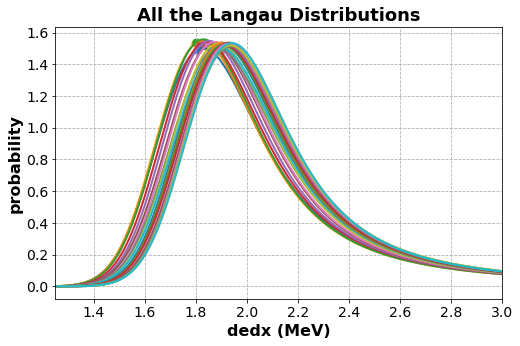

In [43]:
from scipy.optimize import minimize

plt.figure(figsize=(8,5))
for i, l_ in fitdf.iterrows():
    result = minimize(lambda x, mpv, eta, sig: -langau_pdf(x, mpv, eta, sig), x0 = 1.8, args=(l_[0],l_[1],l_[2]), method='Powell')
    x_ = np.linspace(0,7,1000)
    y_ = np.array([ langau_pdf(x, l_[0], l_[1], l_[2]) for x in x_ ])
    plt.plot(x_,y_, ls='-')
    # plt.plot([result.x[0], result.x[0]], [0,1.7], ls='--')
    plt.xlim(1.25,3)
    plt.scatter([l_.mpv],[langau_pdf(l_.mpv, l_.mpv, l_.eta, l_.sigma)],s=50)
    
plt.xlabel('dedx (MeV)')
plt.ylabel('probability')
plt.title('All the Langau Distributions')

plt.show()

Not sure what the purpose of this plot is. Looks like something Edgar would be doing. The main thing to note is that the slight variations in the shapes of these distributions lead to large favorability of certain Landau bins over the others. Might be worthwhile to look into the probability of the maximum value vs how favorable the bin is compared to surrounding bins. Maybe if we force the spreads ($\eta$ and $\sigma$) to be the same for each distribution, the horizontal offsets alone will be able to more accurately pick out the information we want. This might be equivalent to the method of just looking at the mpvs rather than the whole distribution.
- Another thing to note is that the mpv parameters are not actually the most probable values in this plot. This is because of the Gaussian convolution, but for now, it should not matter.

In [6]:
cer = CER()
cer.load_muons()
cer.slim_muons()
print(len(cer.muons))

Loading Data...
Loaded!
Sorting into array of muons...
Done!
Removed 5661 muons.
4123


In [7]:
_dedx = cer.muons[1].dedx_y
_dedx = _dedx[(_dedx > 1.25) & (_dedx < 6)]
len(_dedx)

156

In [44]:
display(likedf.iloc[-10:])

,truth,reconstructed_min,reconstructed_max,L0,L1,L2,L3,L4,L5,L6,...,L10,L11,L12,L13,L14,L15,L16,L17,L18,L19
4113,2.312588,1.616180,1.922888,-664.575689,-664.229260,-663.505817,-662.539564,-661.964091,-662.626108,-662.441911,...,-666.245702,-667.049528,-667.632154,-668.961507,-671.078532,-671.798984,-672.867380,-674.871022,-674.836665,-676.160763
4114,5.673496,19.276368,30.691736,-672.061968,-674.733921,-673.603776,-669.123011,-666.517077,-663.710833,-662.015558,...,-657.150611,-656.556820,-656.192613,-655.841021,-655.051405,-655.709566,-654.752327,-654.766817,-654.475853,-655.246131
4115,1.900803,0.100015,0.775131,-77.095473,-77.224035,-77.248994,-77.120391,-77.220299,-77.489129,-77.436618,...,-78.083471,-78.209798,-78.247659,-78.474183,-78.720059,-79.020991,-78.950253,-79.276887,-79.182178,-79.579451
4116,1.401857,0.775131,1.051753,-654.265232,-653.538178,-656.010956,-662.011676,-668.520774,-675.163010,-680.823348,...,-702.468735,-708.845189,-708.947603,-713.017299,-722.619656,-724.682166,-731.563249,-733.028377,-736.057248,-738.745861
4117,3.696756,19.276368,30.691736,-934.894559,-939.081660,-937.352745,-930.451328,-926.315674,-921.611634,-918.979944,...,-910.403418,-909.283806,-908.612714,-907.757136,-906.090939,-906.878622,-905.252497,-904.842048,-904.431209,-905.270353
4118,1.857909,0.100015,0.775131,-1229.104755,-1229.552341,-1230.115065,-1231.622264,-1234.309374,-1237.480685,-1240.846434,...,-1255.870583,-1260.733042,-1260.951928,-1264.330664,-1272.281625,-1274.056225,-1279.799636,-1281.679202,-1284.044050,-1286.607714
4119,4.393628,3.050361,3.529028,-659.032819,-659.345321,-658.218410,-656.024242,-654.331601,-653.381937,-652.654410,...,-652.890233,-653.059083,-653.398866,-653.990774,-654.995562,-655.277488,-655.902582,-657.103910,-657.076476,-657.758128
4120,1.795314,19.276368,30.691736,-399.827474,-403.043161,-402.302465,-398.002940,-395.684799,-392.502429,-390.844433,...,-384.064588,-383.156357,-382.415213,-381.452435,-379.672918,-380.215877,-378.618702,-377.632228,-377.353034,-377.723508
4121,3.579648,0.100015,0.775131,-278.100170,-278.669876,-279.180630,-279.784830,-281.037548,-282.174291,-283.287069,...,-287.674358,-289.190037,-289.057599,-289.978048,-292.175373,-292.931660,-294.358511,-294.608954,-295.316695,-296.223693
4122,6.536411,30.691736,99.727712,-477.714847,-480.573885,-479.395111,-474.761550,-471.737712,-467.897120,-466.125361,...,-458.587835,-457.521213,-456.905283,-455.793577,-454.003545,-454.022916,-452.874233,-451.820932,-451.701530,-451.531331


I noticed that muon 4118 has a pretty bad likelihood estimation, so I investigate further below. I first plot the dedx distribution for that muon, and it looks fairly normal. Then I plot the dedx distribution of another muon ( 4115) with similar true energy, which also looks normal. The main difference looks to be that 4118 has many more dedx events, which would each lower the likelihood, but it is still surprising that it lowers it so much that it reaches machine precision. Will later explore the possibility that muons with high-count particle tracks present issues. This could also indicate an issue with the calculation of the likelihood

450


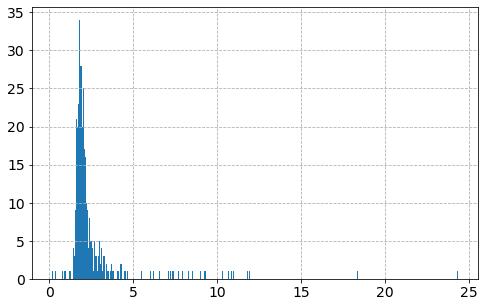

In [45]:
mu = 4118
weird_muon = cer.muons[mu]
plt.figure(figsize=(8,5))
plt.hist(weird_muon.dedx_y, 500)
print(len(weird_muon.dedx_y))
plt.show()

In [10]:
min(weird_muon.dedx_y)

0.1634223759174347

The issue may actually be this extremely low dedx data point, since the Landau is cut off so sharply at low values

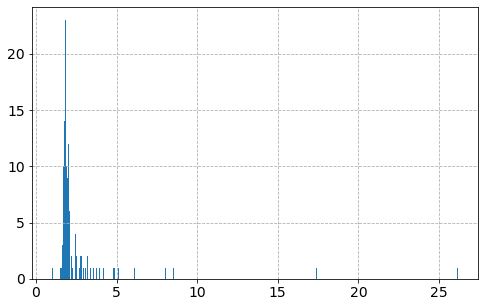

In [11]:
mu = 4115
normal_muon = cer.muons[mu]
plt.figure(figsize=(8,5))
plt.hist(normal_muon.dedx_y, 500)
plt.show()

In [46]:
min(normal_muon.dedx_y)

1.0114147663116455

## Raw heatmap of reconstructed energy vs true energy

In [47]:
truth = likedf.truth
reconstructed = likedf[["reconstructed_min", "reconstructed_max"]].mean(1)
ebins = fitdf.e_min.to_list()
ebins.append(fitdf.e_max.iloc[-1])

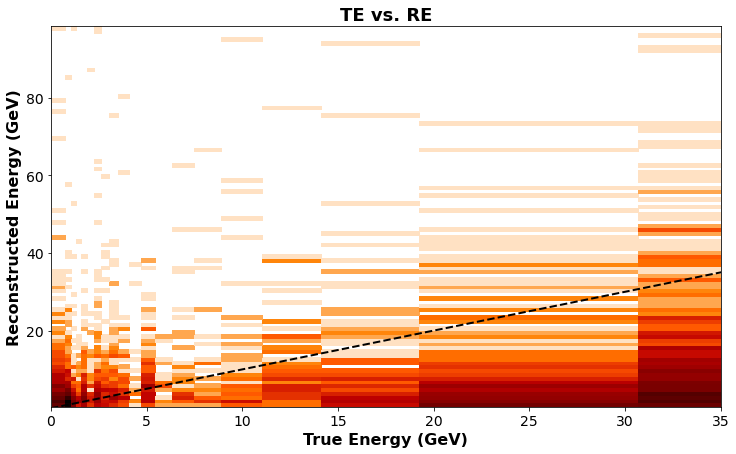

In [48]:
_x = np.linspace(0, 100, 1000)
fig = plt.figure()

plt.hist2d(reconstructed, truth, bins=[ebins,100], norm=LogNorm(0.7), cmap='gist_heat_r')
plt.plot(_x,_x, color='k', ls='--')
plt.xlabel('True Energy (GeV)')
plt.ylabel('Reconstructed Energy (GeV)')
plt.title('TE vs. RE')
plt.xlim(0,35)
plt.show()

## Characterization of the Accuracy

I try to characterize the accuracy (the linear displacement between the true value minus the mean of the reconstructed bins). Then I plot this against the true and reconstructed energies to see if there is some correlation between them, i.e. are we more accurate in reconstructing low-energy, mid-energy, high-energy muons? Are muons we in certain energy bins more accuracte than others?

The results don't really say much, just that the muons we reconstructed to be in the highest energy bins tended to have true energy much lower, and the muons in the lower energy bins tended to have energy much higher than predicted.

In [49]:
accuracy = truth - reconstructed
display(accuracy)

0      -55.871298
1        0.250738
2       12.433069
3        6.130238
4        3.608413
          ...    
4118     1.420336
4119     1.103934
4120   -23.188738
4121     3.142075
4122   -58.673313
Length: 4123, dtype: float64

Text(0, 0.5, 'Accuracy')

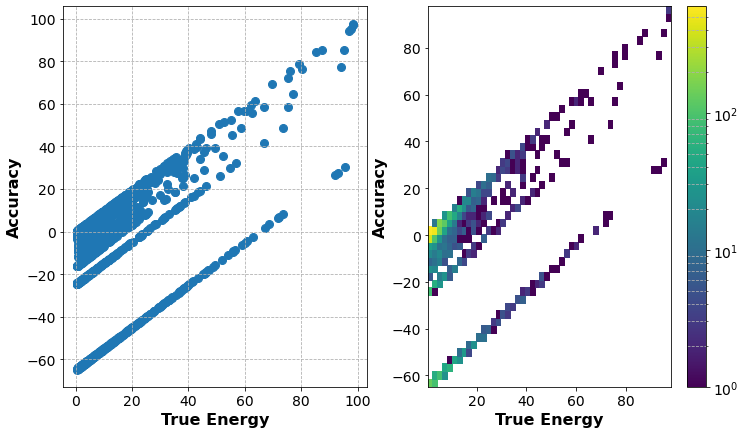

In [50]:
fig, axs = plt.subplots(1,2)
ax1, ax2 = axs
ax1.scatter(likedf.truth, accuracy)
ax1.set_xlabel("True Energy")
ax1.set_ylabel("Accuracy")
hh = ax2.hist2d(likedf.truth, accuracy, 50, norm=LogNorm())
fig.colorbar(hh[3], ax=ax2)
ax2.set_xlabel("True Energy")
ax2.set_ylabel("Accuracy")

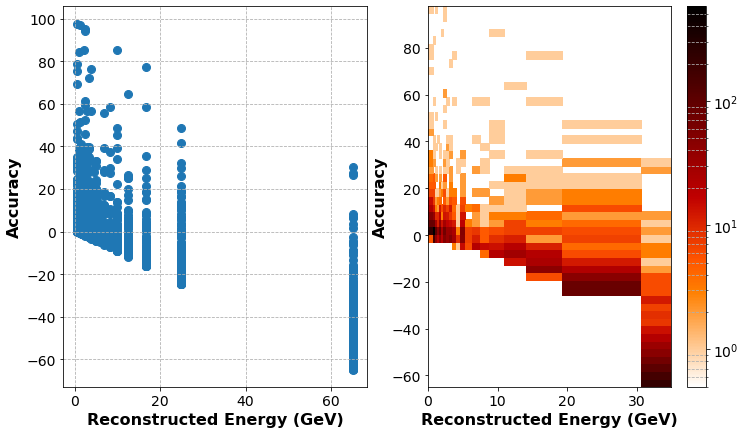

In [51]:
fig, axs = plt.subplots(1,2)
ax1, ax2 = axs
ax1.scatter(reconstructed, accuracy)
ax1.set_xlabel("Reconstructed Energy (GeV)")
ax1.set_ylabel("Accuracy")
hh = ax2.hist2d(reconstructed, accuracy, [ebins, 50], norm=LogNorm(vmin=.5), cmap='gist_heat_r')
fig.colorbar(hh[3], ax=ax2)
ax2.set_xlabel("Reconstructed Energy (GeV)")
ax2.set_ylabel("Accuracy")
ax2.set_xlim(0,35)
plt.show()

## Percent Accuracy
Quick check for how many times we got the correct answer (where the true energy was inside the energy bin predicted by the likelihood)

In [52]:
num_correct = likedf.query('truth > reconstructed_min & truth < reconstructed_max').shape[0]
num_particles = likedf.shape[0]
print(num_correct)
print(num_particles)
print(f'Accuracy: {num_correct/num_particles * 100:.2f}%')

285
4123
Accuracy: 6.91%


This is about the same accuracy as randomly guessing, even with the statistically binned fits

## Binned Distributions at certain true / reconstructed energies

In [53]:
re = likedf[["reconstructed_min", "reconstructed_max"]].mean(1)

In [54]:
def plot_re_dist(telo, tehi, highlight=False, otherdist=None, save=False, i=0):
    df_ebin = likedf.query(f'truth < {tehi} & truth > {telo}')
    re_centers = df_ebin[["reconstructed_min", "reconstructed_max"]].mean(1)
    if otherdist is not None:
        re_centers = otherdist
    
    fig = plt.figure(figsize=(10, 5))
    ax = fig.gca()
    counts = ax.hist(re_centers, ebins, edgecolor='black', lw = '1.2')[0]
    ax.plot([],[],label=f'tot. = {np.sum(counts):.0f} particles')
    if highlight:
        minloc, maxloc = np.digitize([telo, tehi], ebins) - 1
        if np.isin([tehi], ebins)[0]:
            maxloc -= 1
        highlight_bins = [telo, *ebins[minloc+1:maxloc], tehi]
        ax.hist(re_centers, highlight_bins, color='r', edgecolor='black', lw = '1.2', label="correct bin")
        
    ax.set_xlabel('Reconstructed Energy (GeV)')
    ax.set_ylabel('Counts')
    ax.set_title(fr'R.E. Distribution for T.E.$\in$({telo:.2f},{tehi:.2f}) GeV')
    ax.set_xlim(0, 35)
    ax.legend()
    fig.show()
    if save:
        savefig(fig, fr'1D_Dists/RE_dist_for_TE_bin{i}.png')
    return fig, counts

In [55]:
def plot_te_dist(relo, rehi, highlight=False, save=False, i=0):
    df_ebin = likedf.query(f'(reconstructed_min+reconstructed_max)/2 < {rehi} & (reconstructed_min+reconstructed_max)/2 > {relo}')
    te = df_ebin.truth
    fig, _ = plot_re_dist(relo, rehi, highlight=highlight, otherdist=te)
    plt.xlabel('True Energy (GeV)')
    plt.title(fr'T.E. Distribution for R.E.$\in$({relo:.2f},{rehi:.2f}) GeV')
    if save:
        savefig(fig, fr'1D_Dists/TE_dist_for_RE_bin{i}.png')

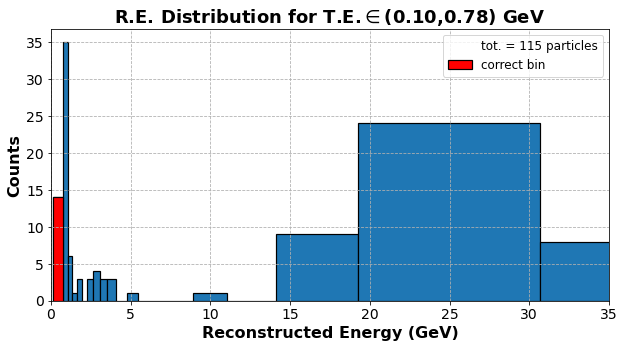

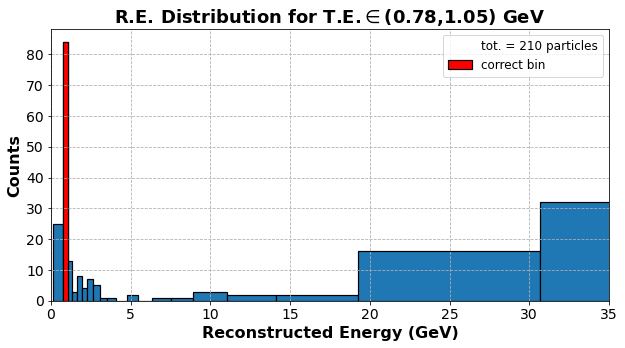

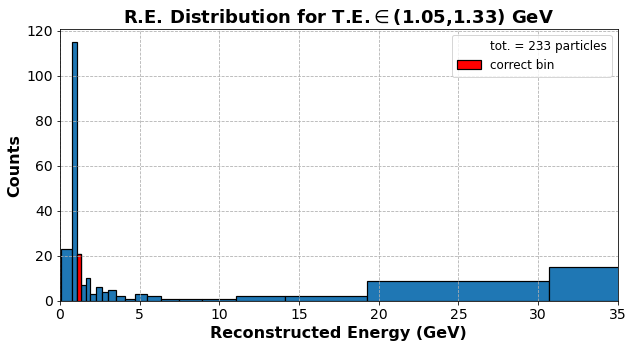

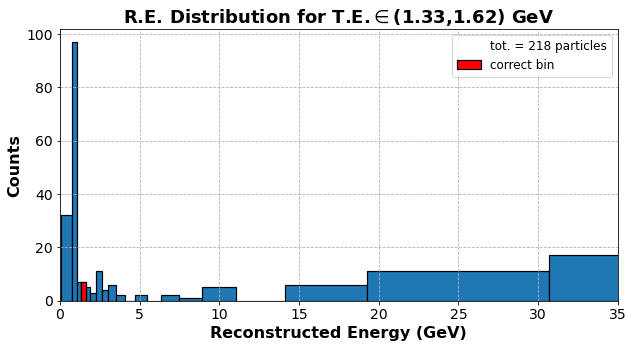

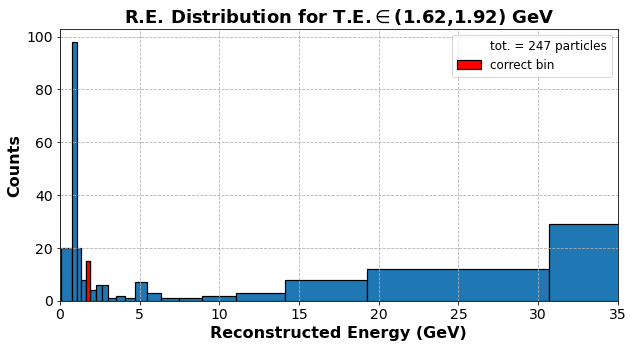

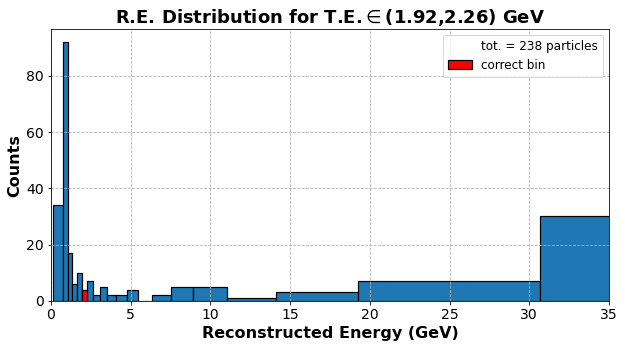

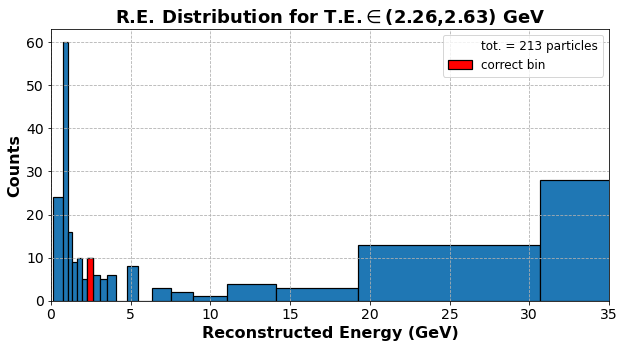

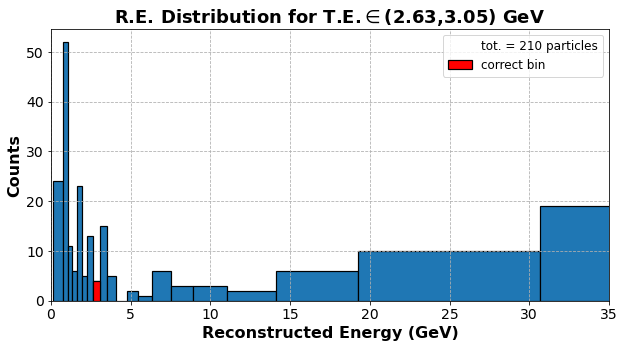

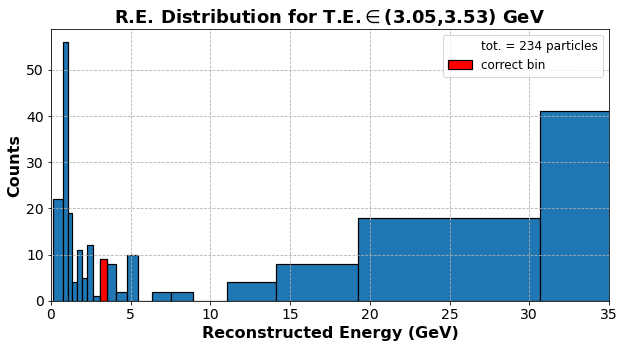

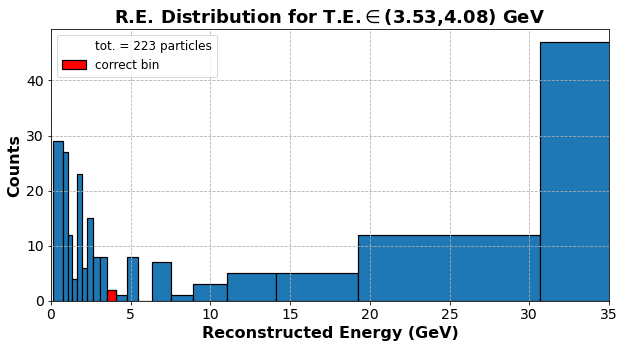

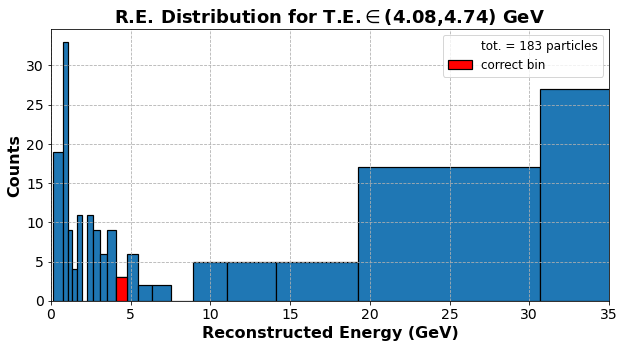

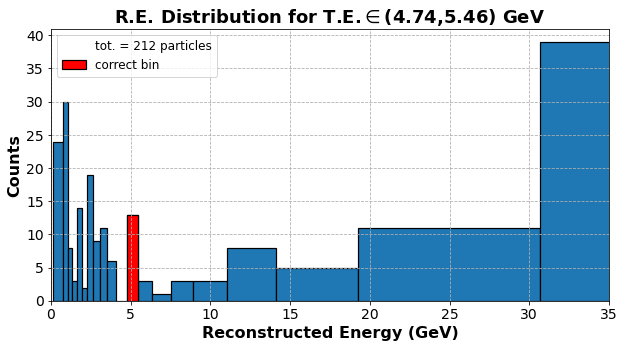

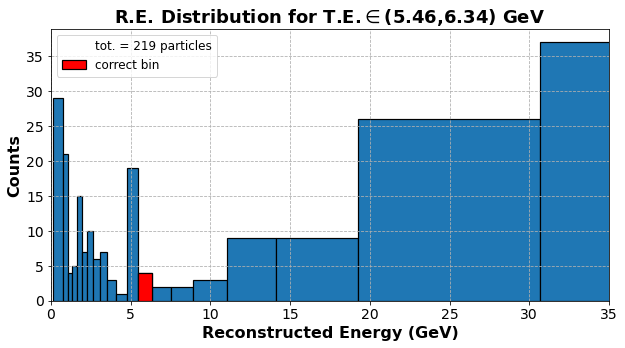

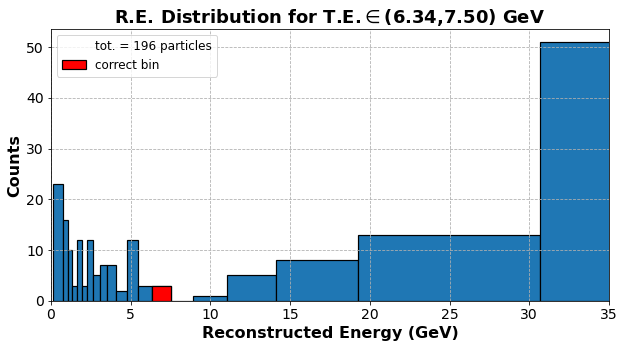

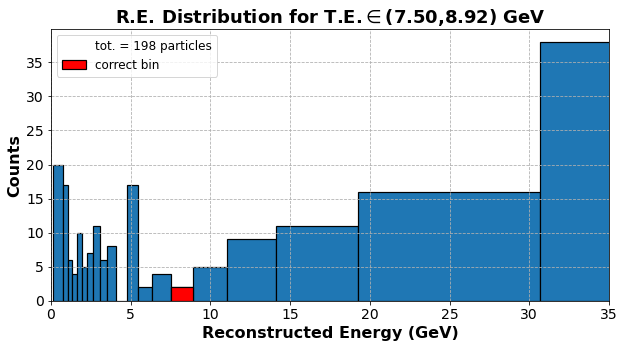

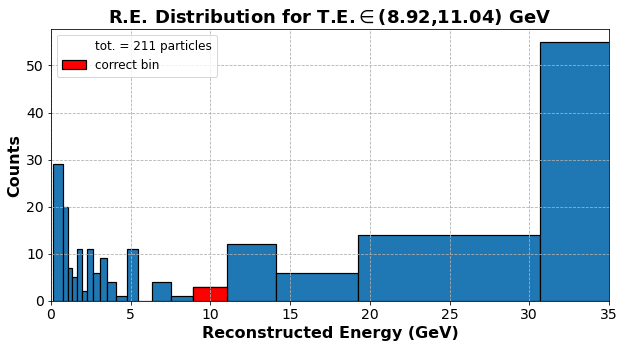

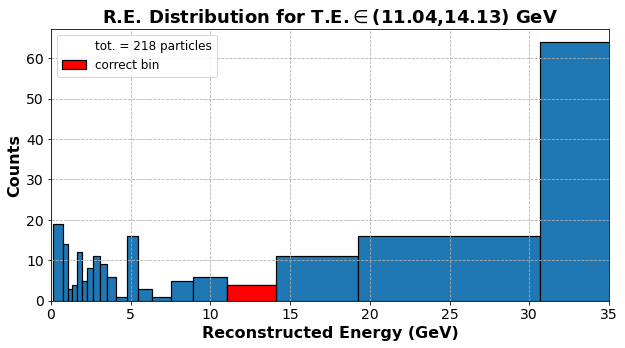

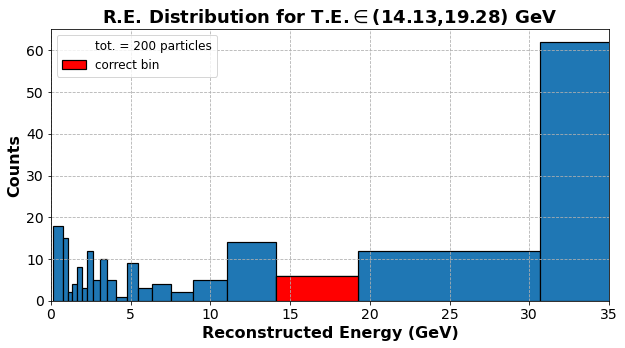

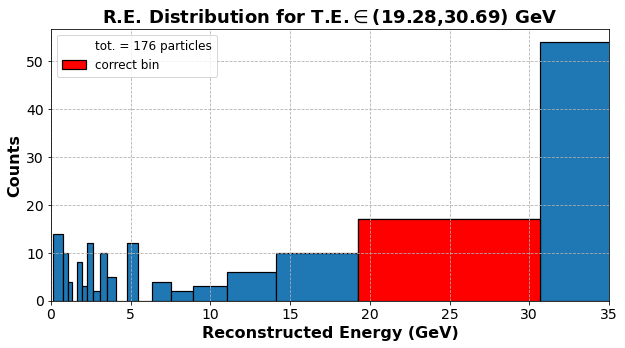

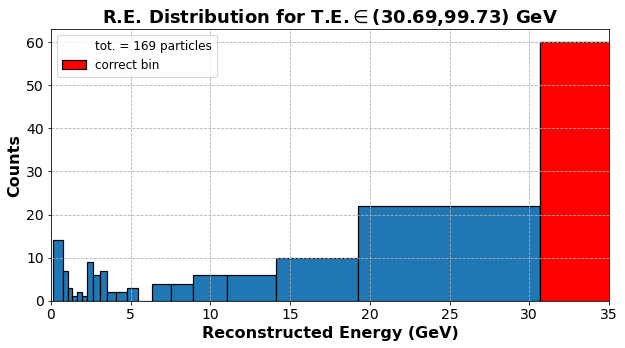

In [56]:
for i in range(0,len(ebins)-1):
    counts = plot_re_dist(ebins[i], ebins[i+1], highlight=True)

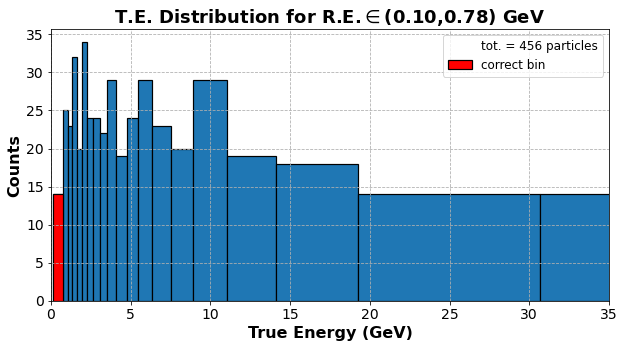

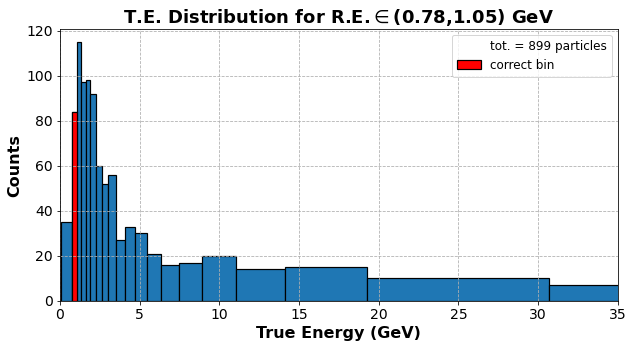

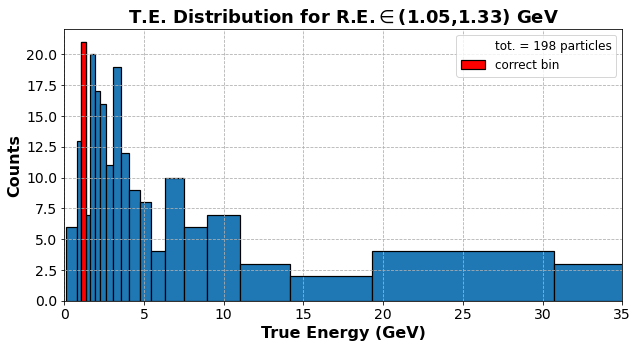

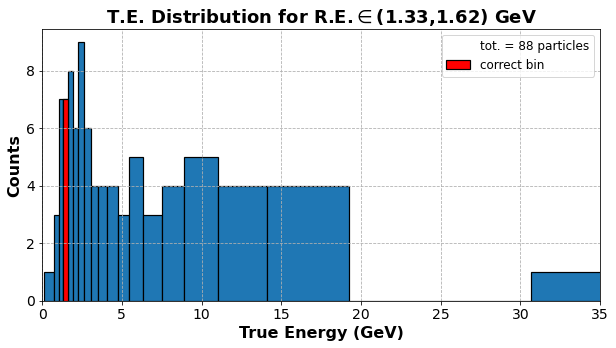

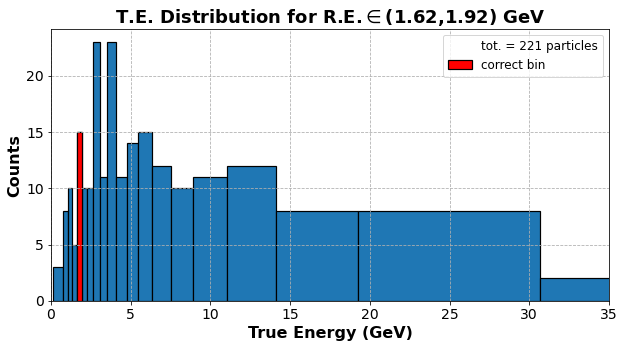

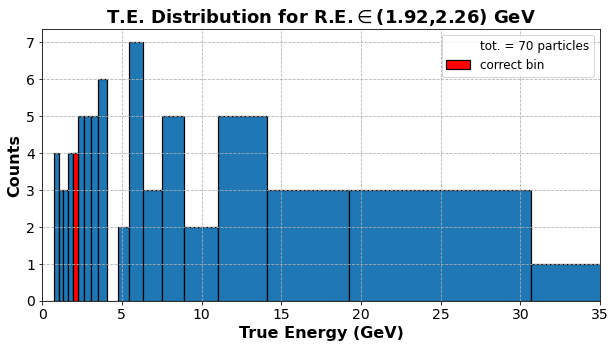

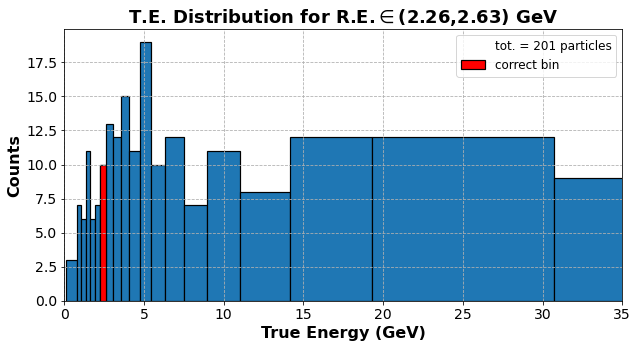

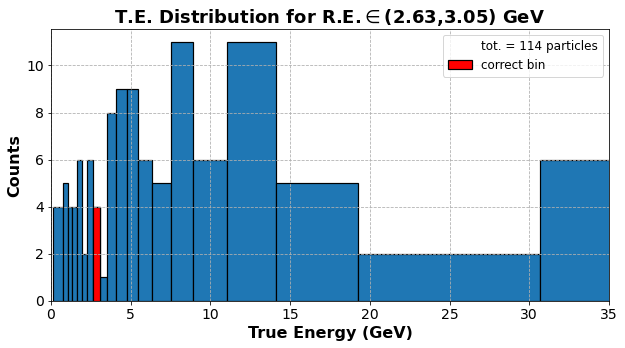

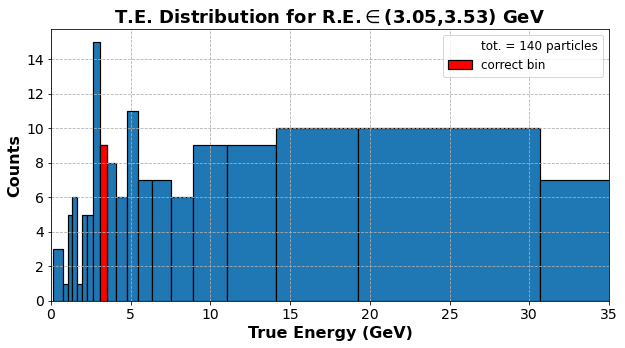

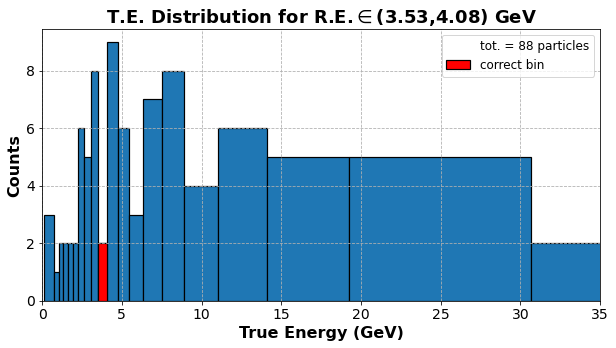

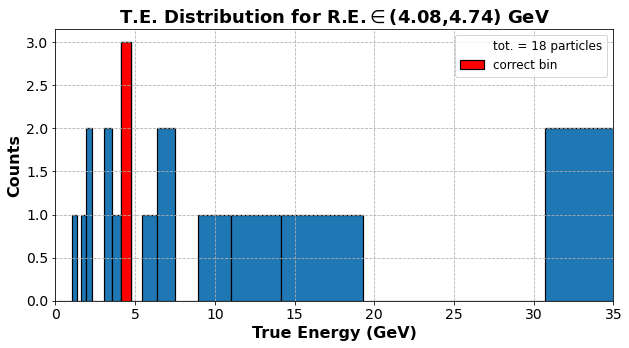

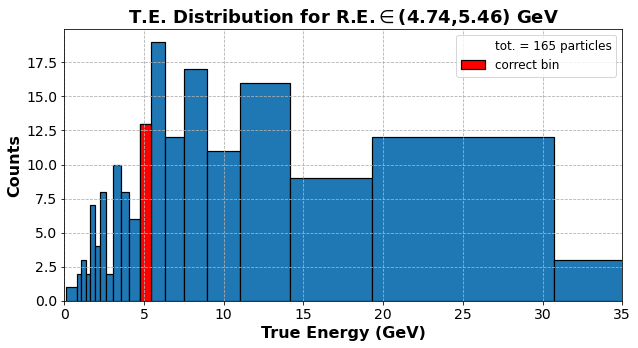

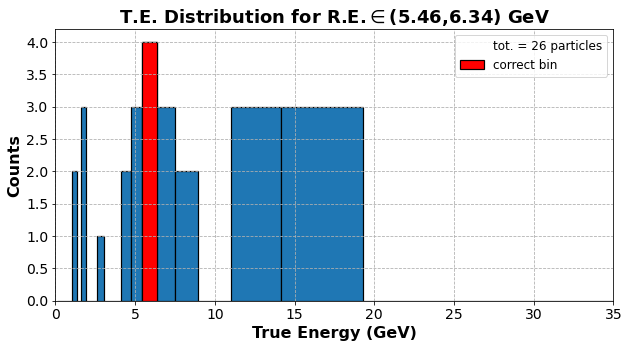

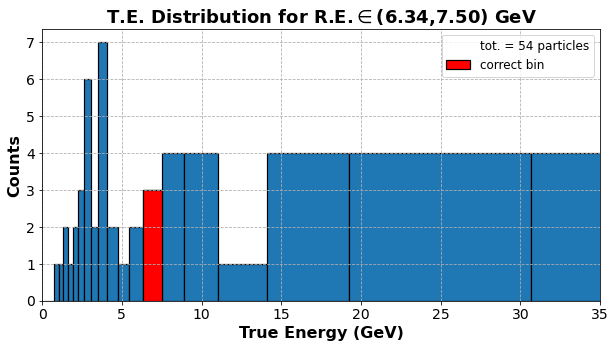

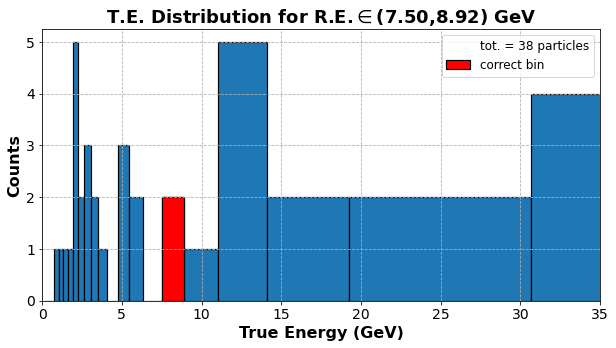

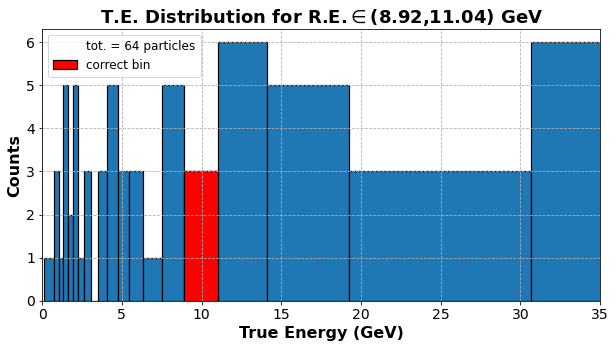

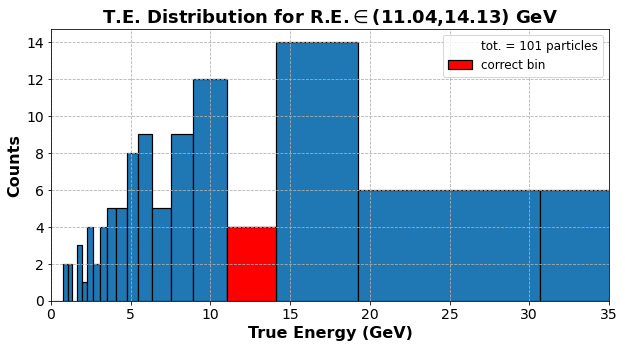

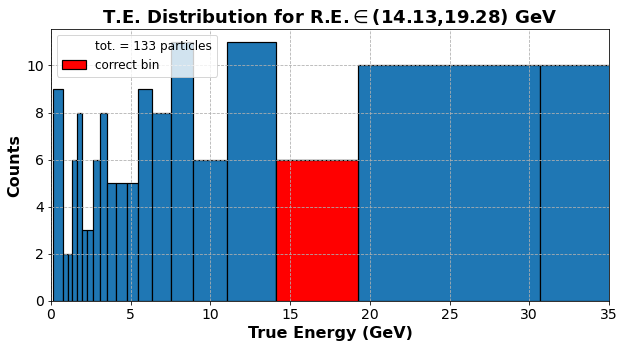

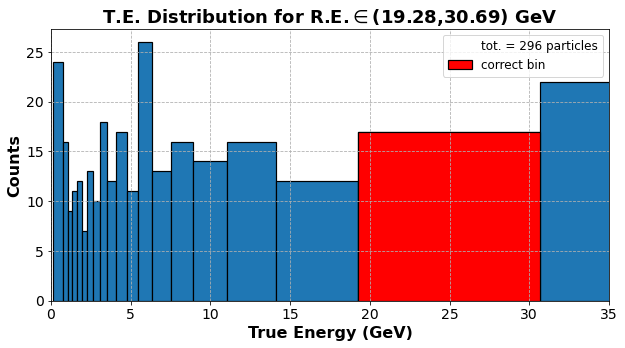

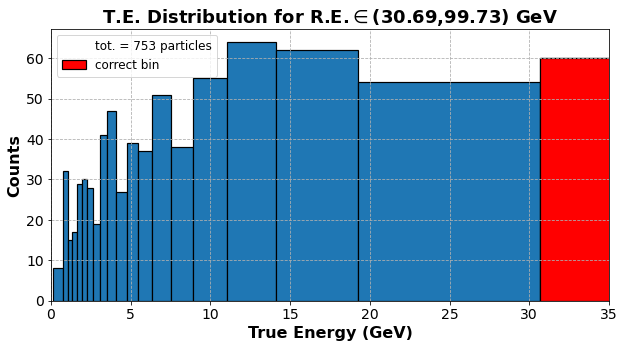

In [57]:
for i in range(0,len(ebins)-1):
    counts = plot_te_dist(ebins[i], ebins[i+1], highlight=True)

Multiply by prior probability distribution to obtain more appropriate probability for the likelihood. This will require knowing the prior, which can just be the probability distribution of cosmic muons as a function of energy, which I assume is generally well-understood.

## Dependence on track length
Here I explore further the idea that the track length of the particle has a confounding effect on the likelihood

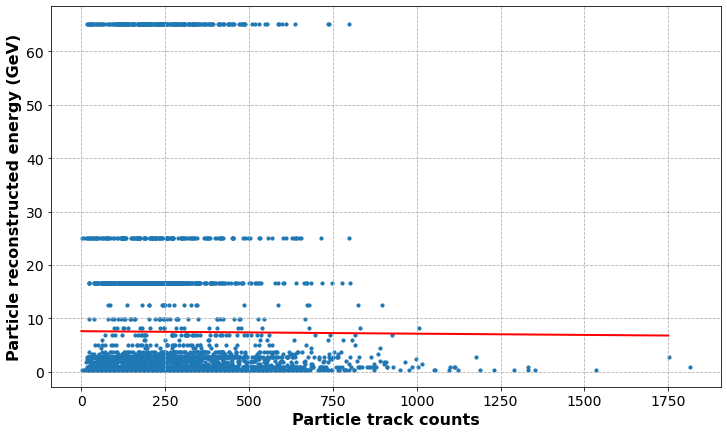

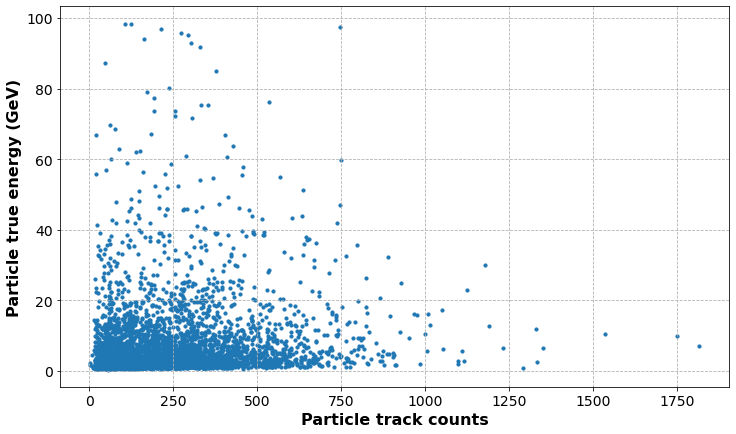

In [25]:
trkl = []
for mu in cer.muons:
    l = mu.dedx_y.shape[0]
    trkl.append(l)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(lambda x,a,b: a*x+b, trkl, re)
fig = plt.figure()
plt.scatter(trkl, re, s=10)
_x = np.linspace(0,1750, 1000)
_y = popt[0] * _x + popt[1]
plt.plot(_x,_y, ls='-', c='r')
plt.xlabel('Particle track counts')
plt.ylabel('Particle reconstructed energy (GeV)')
plt.show()
plt.figure()
plt.scatter(trkl, truth, s=10)
plt.xlabel('Particle track counts')
plt.ylabel('Particle true energy (GeV)')
plt.show()

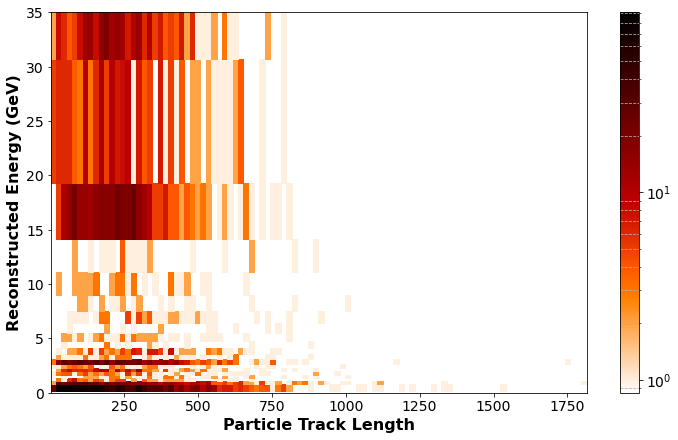

In [26]:
plt.hist2d(trkl, re, bins=[100, ebins], norm=LogNorm(vmin=0.85), cmap='gist_heat_r')
plt.ylim(0,35)
plt.colorbar()
plt.ylabel('Reconstructed Energy (GeV)')
plt.xlabel('Particle Track Length')
plt.show()